import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df_test = pd.read_csv('/content/test_data.txt', sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv('/content/train_data.txt', sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name' , 'confession']

In [3]:
df_test.head()


,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [4]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          18028 non-null  int64 
 1   movie_name  18028 non-null  object
 2   confession  18028 non-null  object
dtypes: int64(1), object(2)
memory usage: 422.7+ KB


In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          1602 non-null   int64 
 1   movie_name  1602 non-null   object
 2   category    1602 non-null   object
 3   confession  1602 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.2+ KB


In [7]:
df_train.describe()


,SN
count,1602.000000
mean,802.500000
std,462.601881
min,2.000000
25%,402.250000
50%,802.500000
75%,1202.750000
max,1603.000000


In [8]:
df_test.describe()

,SN
count,18028.000000
mean,9015.500000
std,5204.379662
min,2.000000
25%,4508.750000
50%,9015.500000
75%,13522.250000
max,18029.000000


In [9]:
df_test.isnull().sum()

,0
SN,0
movie_name,0
confession,0


In [10]:
df_train.isnull().sum()

,0
SN,0
movie_name,0
category,0
confession,0


In [11]:
df_train.count()

,0
SN,1602
movie_name,1602
category,1602
confession,1602


In [12]:
df_test.count()

,0
SN,18028
movie_name,18028
confession,18028


In [15]:
df_train.iloc[0:10]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
5,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
6,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
7,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
8,10,Spirits (2014/I),horror,Four high school students embark on a terrify...
9,11,The Spirit World: Ghana (2016),documentary,Tom Beacham explores Ghana with Director of P...


In [16]:
df_train.loc[12]

,12
SN,14
movie_name,Interrabang (1969)
category,thriller
confession,"A photographer is sailing with his wife, her ..."


In [17]:
df_test.shape

(18028, 3)

In [18]:
df_train.shape


(1602, 4)

visualization of data


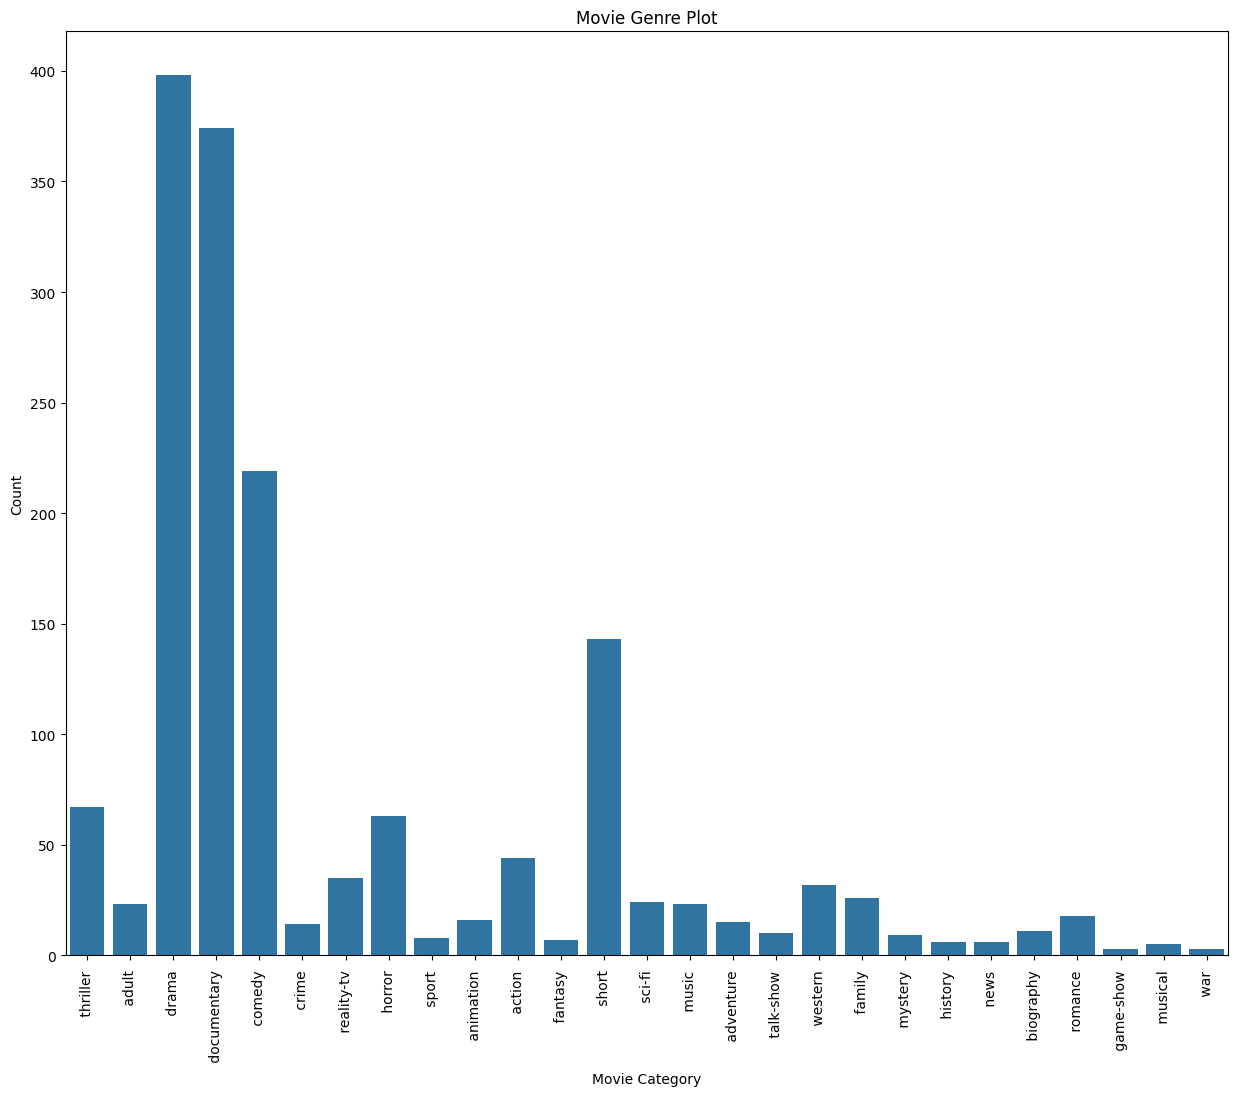

In [19]:
plt.figure(figsize=(15,12))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

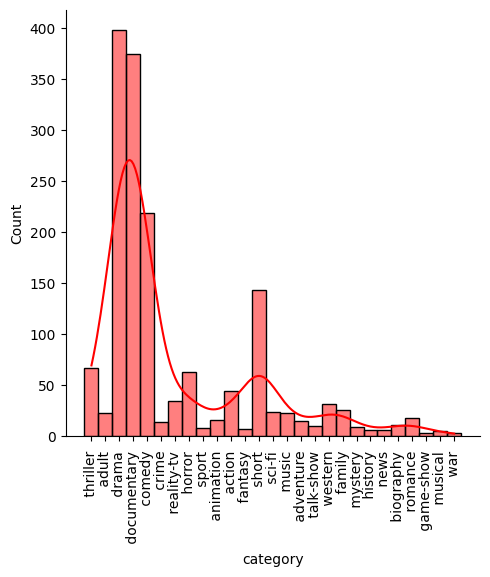

In [21]:
sns.displot(df_train.category, kde =True, color = "red")
plt.xticks(rotation=90);

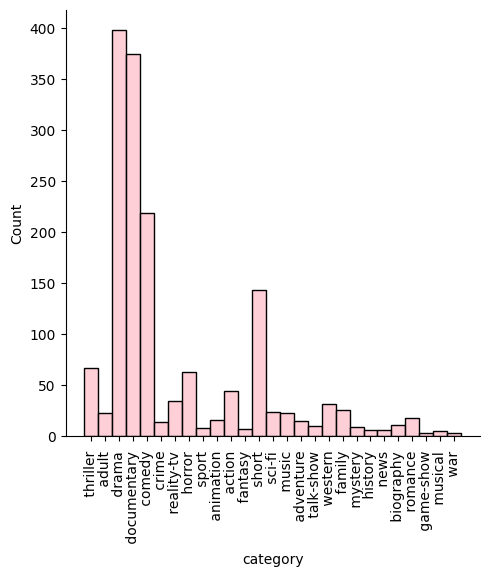

In [22]:
sns.displot(df_train.category, kde=False, color = "pink")
plt.xticks(rotation=90);

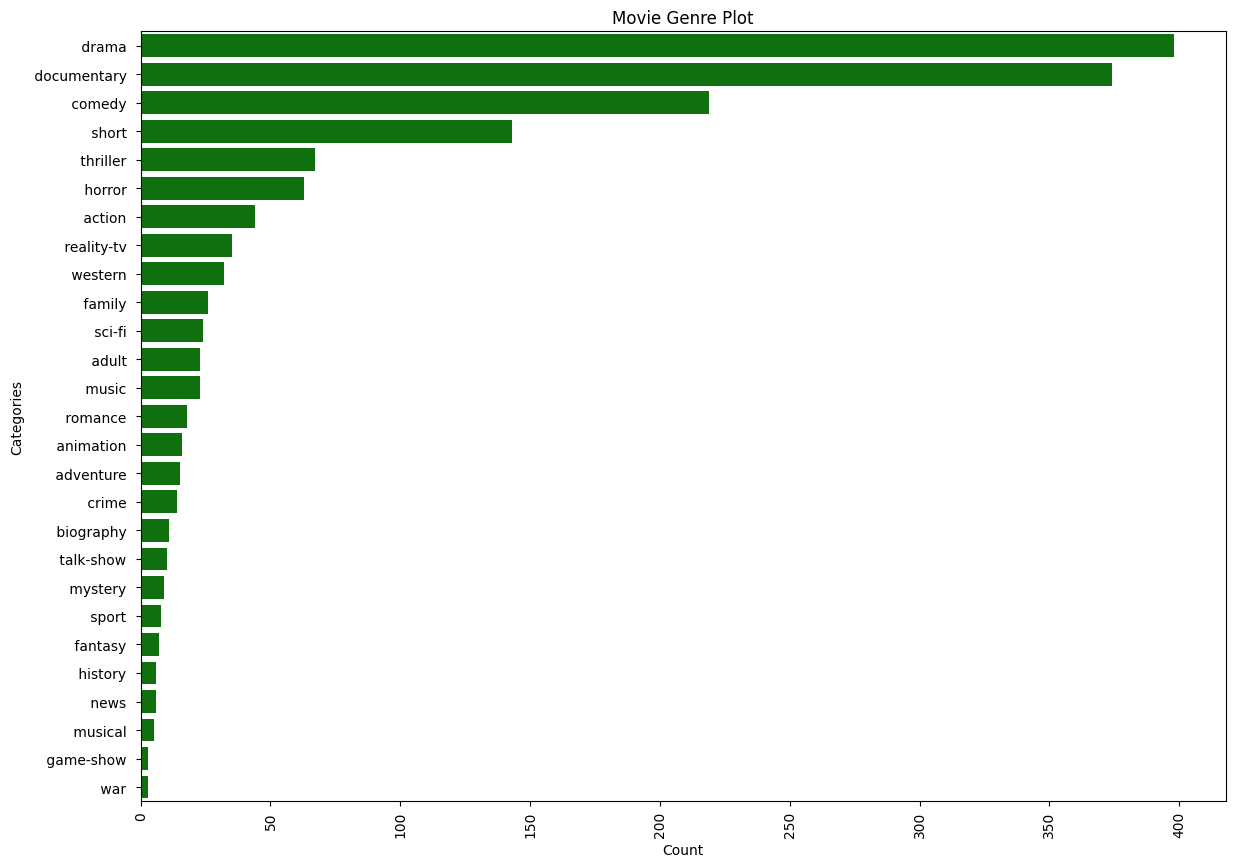

In [27]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h',color = 'green')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

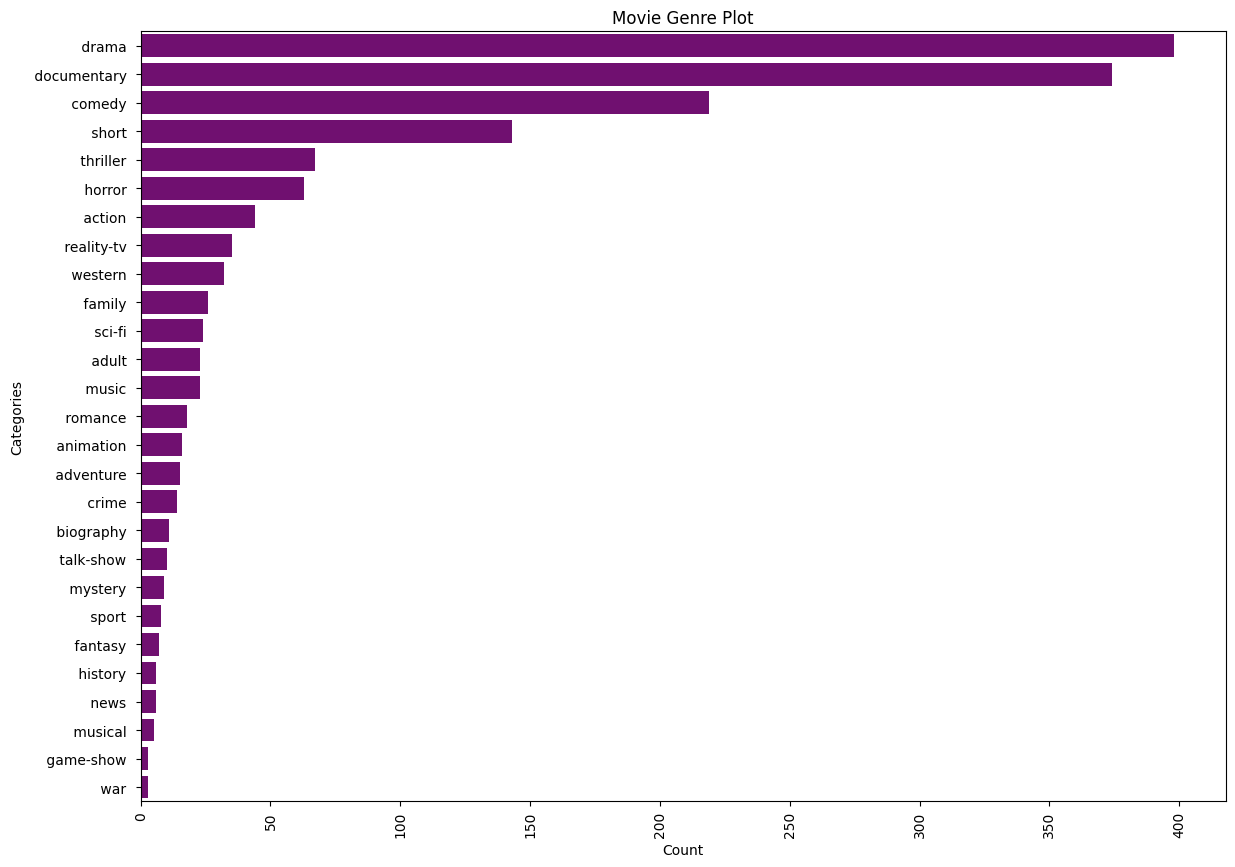

In [28]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h',color='purple')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

In [29]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [30]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [32]:
df_combined.shape

(19630, 4)

In [33]:
df_combined.size

78520

In [34]:
df_combined.isnull().any()

,0
SN,False
movie_name,False
category,True
confession,False


In [35]:
df_combined.count()

,0
SN,19630
movie_name,19630
category,1602
confession,19630


In [36]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)

In [37]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [38]:
df_combined.head()

,SN,movie_name,category,confession
0,2,5626,24,A brother and sister with a past incestuous r...
1,3,19457,1,As the bus empties the students for their fie...
2,4,17367,8,To help their unemployed father make ends mee...
3,5,17605,8,The film's title refers not only to the un-re...
4,6,13386,7,Quality Control consists of a series of 16mm ...


In [39]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [40]:
df_combined.count()

,0
SN,19630
movie_name,19630
category,19630
confession,19630


In [41]:
df_combined.duplicated().values.any()

False

PREPROCESS THE DATA

In [48]:
vectorizer = TfidfVectorizer()

In [49]:
X = vectorizer.fit_transform(df_combined["confession"])

In [42]:
df_combined.duplicated().values.any()

False

In [45]:
df_combined.head()

,SN,movie_name,category,confession
0,2,5626,24,A brother and sister with a past incestuous r...
1,3,19457,1,As the bus empties the students for their fie...
2,4,17367,8,To help their unemployed father make ends mee...
3,5,17605,8,The film's title refers not only to the un-re...
4,6,13386,7,Quality Control consists of a series of 16mm ...


In [46]:
y = df_combined["category"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Naive Bayes Classifier¶

In [51]:
naive_bayes_model = MultinomialNB()

In [59]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [53]:
MultinomialNB()

MultinomialNB()

In [60]:
nb_predictions = naive_bayes_model.predict(X_test)

In [61]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    8]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    3]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   41]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Logistic Regression Model

In [62]:
logistic_regression_model = LogisticRegression()


In [63]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [64]:
LogisticRegression()

LogisticRegression()

In [65]:
lr_predictions = logistic_regression_model.predict(X_test)

In [66]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))

Logistic Regression Model:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    8]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    3]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   41]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    4]
 [   0    0    0    0    0  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
